In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Downloads/dataset.csv')
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
#checking unique values
df.nunique()

index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [4]:
#checking null values
df.isna().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

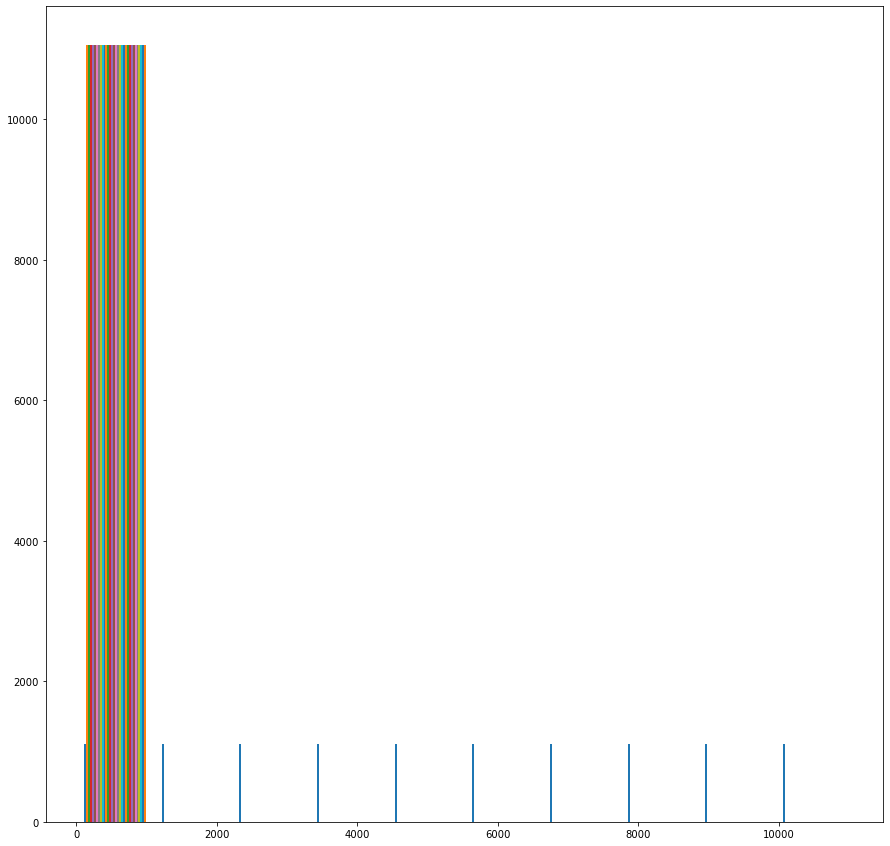

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.hist(df)
plt.show()

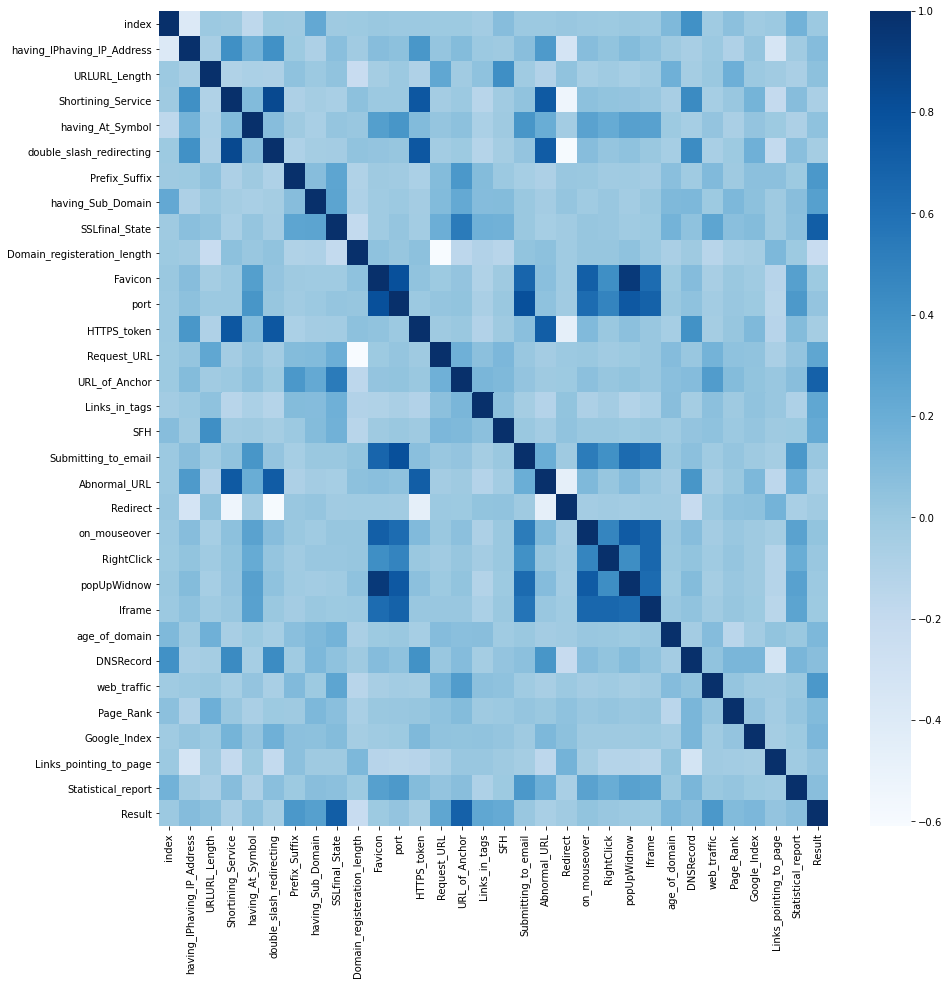

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df[df.columns].corr(),cmap='Blues')
plt.show()

# CHECKING CORRELATION BETWEEN CERTAIN COMBINATIONS OF FEATURES AS EXHIBITED IN THE ENTIRE HEATMAP
### ALL FEATURES WITH CORRELATION MORE THAN 0.5 HAVE BEEN FILTERED OUT

### THE FOLLOWING FEATURE GROUPS HAD HIGH CORRELATION: (popUpWidnow,Iframe,oon_markdown,RightClick), (popUpWidnow,Favicon),
### (port,Favicon),(port,popUpWidnow),(Shortining_Service,double_slash_redirecting),(port,Submitting_to_email),
### (URL_of_Anchor,Result), (SSLfinal_State,Result),(URL_of_Anchor, SSLfinal_State),(Favicon,Submitting_to_email)

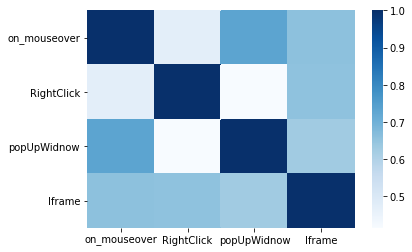

In [7]:
sns.heatmap(df[['on_mouseover','RightClick','popUpWidnow','Iframe']].corr(), cmap='Blues')
plt.show()

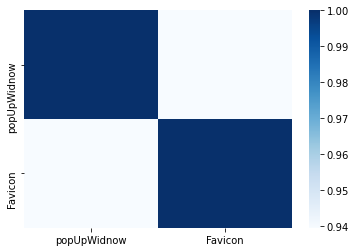

In [8]:
sns.heatmap(df[['popUpWidnow','Favicon']].corr(), cmap='Blues')
plt.show()

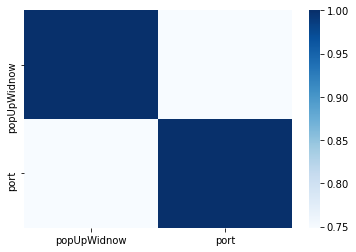

In [9]:
sns.heatmap(df[['popUpWidnow','port']].corr(), cmap='Blues')
plt.show()

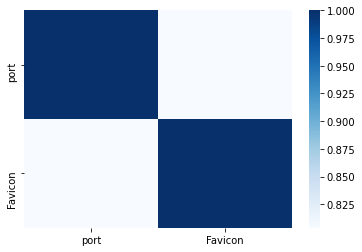

In [10]:
sns.heatmap(df[['port','Favicon']].corr(), cmap='Blues')
plt.show()

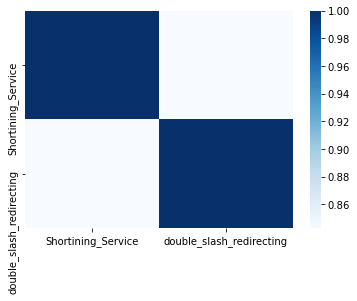

In [11]:
sns.heatmap(df[['Shortining_Service','double_slash_redirecting']].corr(), cmap='Blues')
plt.show()

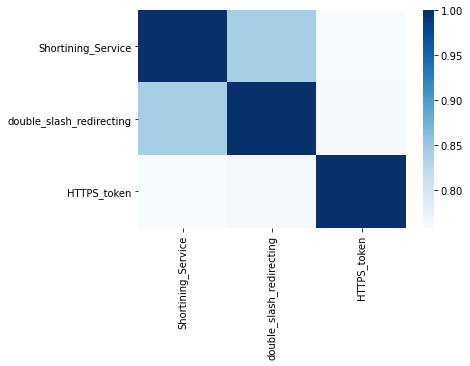

In [12]:
sns.heatmap(df[['Shortining_Service','double_slash_redirecting','HTTPS_token']].corr(), cmap='Blues')
plt.show()

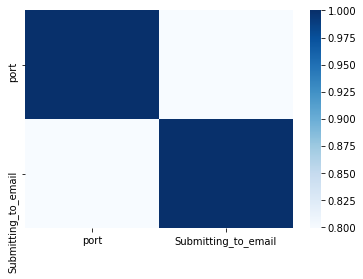

In [13]:
sns.heatmap(df[['port','Submitting_to_email']].corr(), cmap='Blues')
plt.show()

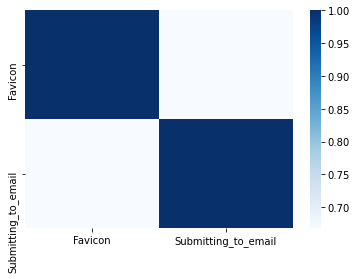

In [14]:
sns.heatmap(df[['Favicon','Submitting_to_email']].corr(), cmap='Blues')
plt.show()

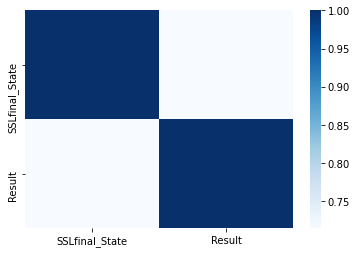

In [15]:
sns.heatmap(df[['SSLfinal_State','Result']].corr(), cmap='Blues')
plt.show()

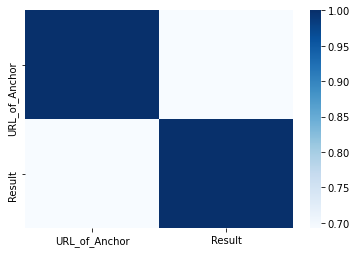

(None,)

In [16]:
sns.heatmap(df[['URL_of_Anchor','Result']].corr(), cmap='Blues')
plt.show(),

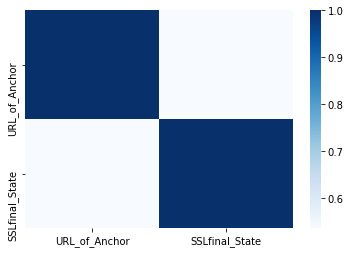

(None,)

In [17]:
sns.heatmap(df[['URL_of_Anchor','SSLfinal_State']].corr(), cmap='Blues')
plt.show(),

### Finally, the following features have been dropped: (popUpWidnow,on_mouseover,port,Favicon,Shortining_Service,double_slash_redirecting,SSLfinal_state)

In [19]:
df.drop(['popUpWidnow','on_mouseover','port','Favicon','Shortining_Service','double_slash_redirecting','SSLfinal_State'], axis = 1,inplace=True)
df

,index,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,HTTPS_token,Request_URL,URL_of_Anchor,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,-1,-1,-1,-1,1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,-1,0,-1,-1,1,0,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,-1,-1,-1,-1,1,0,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,-1,-1,1,-1,-1,0,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,1,-1,1,-1,1,1,0,...,1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,-1,1,1,-1,1,1,1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,-1,-1,1,-1,1,1,-1,...,1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,-1,1,-1,1,1,0,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,-1,-1,1,1,-1,-1,...,1,1,1,1,1,-1,1,1,1,-1


In [20]:
X=df.drop(['Result'],axis=1).values
y=df['Result'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Testing Multiple Machine Learning and one custom Deep Learning model on the same data to have a comparative analysis of all the models, and finally reach a conclusion as to which model gives the best accuracy

In [23]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 0.8733604703753958
score on train: 0.8867028493894166


In [24]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)
print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(X_train, y_train)))

train shape: (8844, 24)
score on test: 0.9118046132971506
score on train: 0.9504748982360922


In [25]:
#SVM
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on test: 0.8697421981004071
score on train: 0.8766395296246042


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("score on test: "  + str(dt.score(X_test, y_test)))
print("score on train: " + str(dt.score(X_train, y_train)))

score on test: 0.9285391225689733
score on train: 1.0


In [27]:
classifier = Sequential()
classifier.add(Dense(128, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(256, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(128, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.compile(optimizer="Adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history=classifier.fit(X_train, y_train, batch_size = 20, epochs = 1000)

Epoch 1/1000
443/443 [==============================] - 2s 849us/step - loss: -186856.6562 - accuracy: 0.3204
Epoch 2/1000
443/443 [==============================] - 0s 833us/step - loss: -6981412.5000 - accuracy: 0.3816
Epoch 3/1000
443/443 [==============================] - 0s 828us/step - loss: -45999044.0000 - accuracy: 0.3832
Epoch 4/1000
443/443 [==============================] - 0s 812us/step - loss: -154788768.0000 - accuracy: 0.3823
Epoch 5/1000
443/443 [==============================] - 0s 821us/step - loss: -375568928.0000 - accuracy: 0.3839
Epoch 6/1000
443/443 [==============================] - 0s 819us/step - loss: -750249408.0000 - accuracy: 0.3827
Epoch 7/1000
443/443 [==============================] - 0s 819us/step - loss: -1316738816.0000 - accuracy: 0.3831
Epoch 8/1000
443/443 [==============================] - 0s 819us/step - loss: -2107260928.0000 - accuracy: 0.3840
Epoch 9/1000
443/443 [==============================] - 0s 817us/step - loss: -3153861376.0000 - acc

443/443 [==============================] - 0s 905us/step - loss: -30572489474048.0000 - accuracy: 0.3830
Epoch 140/1000
443/443 [==============================] - 0s 889us/step - loss: -31368893431808.0000 - accuracy: 0.3826
Epoch 141/1000
443/443 [==============================] - 0s 875us/step - loss: -32182240280576.0000 - accuracy: 0.3827
Epoch 142/1000
443/443 [==============================] - 0s 875us/step - loss: -33014245490688.0000 - accuracy: 0.3826
Epoch 143/1000
443/443 [==============================] - 0s 875us/step - loss: -33859112534016.0000 - accuracy: 0.3829
Epoch 144/1000
443/443 [==============================] - 0s 866us/step - loss: -34718760304640.0000 - accuracy: 0.3829
Epoch 145/1000
443/443 [==============================] - 0s 862us/step - loss: -35597343260672.0000 - accuracy: 0.3826
Epoch 146/1000
443/443 [==============================] - 0s 903us/step - loss: -36490004398080.0000 - accuracy: 0.3826
Epoch 147/1000
443/443 [==============================]

443/443 [==============================] - 0s 819us/step - loss: -368557082804224.0000 - accuracy: 0.3820
Epoch 275/1000
443/443 [==============================] - 0s 821us/step - loss: -373620211712000.0000 - accuracy: 0.3823
Epoch 276/1000
443/443 [==============================] - 0s 819us/step - loss: -378696460402688.0000 - accuracy: 0.3820
Epoch 277/1000
443/443 [==============================] - 0s 828us/step - loss: -383812739530752.0000 - accuracy: 0.3818
Epoch 278/1000
443/443 [==============================] - 0s 826us/step - loss: -388988108013568.0000 - accuracy: 0.3823
Epoch 279/1000
443/443 [==============================] - 0s 810us/step - loss: -394223706701824.0000 - accuracy: 0.3821
Epoch 280/1000
443/443 [==============================] - 0s 819us/step - loss: -399534668644352.0000 - accuracy: 0.3821
Epoch 281/1000
443/443 [==============================] - 0s 817us/step - loss: -404898613035008.0000 - accuracy: 0.3822
Epoch 282/1000
443/443 [=======================

443/443 [==============================] - 0s 815us/step - loss: -1649574397607936.0000 - accuracy: 0.3821
Epoch 409/1000
443/443 [==============================] - 0s 846us/step - loss: -1664982190129152.0000 - accuracy: 0.3822
Epoch 410/1000
443/443 [==============================] - 1s 1ms/step - loss: -1680539501199360.0000 - accuracy: 0.3821
Epoch 411/1000
443/443 [==============================] - 0s 855us/step - loss: -1696149291401216.0000 - accuracy: 0.3820
Epoch 412/1000
443/443 [==============================] - 0s 828us/step - loss: -1711903634096128.0000 - accuracy: 0.3820
Epoch 413/1000
443/443 [==============================] - 0s 817us/step - loss: -1727699584286720.0000 - accuracy: 0.3820
Epoch 414/1000
443/443 [==============================] - 0s 875us/step - loss: -1743633376083968.0000 - accuracy: 0.3820
Epoch 415/1000
443/443 [==============================] - 0s 903us/step - loss: -1759670247096320.0000 - accuracy: 0.3821
Epoch 416/1000
443/443 [=================

443/443 [==============================] - 0s 799us/step - loss: -4873420470747136.0000 - accuracy: 0.3800
Epoch 543/1000
443/443 [==============================] - 0s 844us/step - loss: -4908078172471296.0000 - accuracy: 0.3799
Epoch 544/1000
443/443 [==============================] - 0s 803us/step - loss: -4943005920264192.0000 - accuracy: 0.3799
Epoch 545/1000
443/443 [==============================] - 0s 803us/step - loss: -4978112982941696.0000 - accuracy: 0.3799
Epoch 546/1000
443/443 [==============================] - 0s 801us/step - loss: -5012991875481600.0000 - accuracy: 0.3799
Epoch 547/1000
443/443 [==============================] - 0s 803us/step - loss: -5048160141443072.0000 - accuracy: 0.3801
Epoch 548/1000
443/443 [==============================] - 0s 815us/step - loss: -5083504501063680.0000 - accuracy: 0.3798
Epoch 549/1000
443/443 [==============================] - 0s 808us/step - loss: -5119065219661824.0000 - accuracy: 0.3800
Epoch 550/1000
443/443 [===============

443/443 [==============================] - 0s 812us/step - loss: -11397272319295488.0000 - accuracy: 0.3795
Epoch 677/1000
443/443 [==============================] - 0s 826us/step - loss: -11462278796804096.0000 - accuracy: 0.3795
Epoch 678/1000
443/443 [==============================] - 0s 803us/step - loss: -11527544046092288.0000 - accuracy: 0.3794
Epoch 679/1000
443/443 [==============================] - 0s 808us/step - loss: -11593438508089344.0000 - accuracy: 0.3796
Epoch 680/1000
443/443 [==============================] - 0s 808us/step - loss: -11659681936179200.0000 - accuracy: 0.3795
Epoch 681/1000
443/443 [==============================] - 0s 803us/step - loss: -11726639402582016.0000 - accuracy: 0.3796
Epoch 682/1000
443/443 [==============================] - 0s 799us/step - loss: -11793406816681984.0000 - accuracy: 0.3795
Epoch 683/1000
443/443 [==============================] - 0s 801us/step - loss: -11860500648296448.0000 - accuracy: 0.3796
Epoch 684/1000
443/443 [=======

443/443 [==============================] - 0s 797us/step - loss: -22714224455188480.0000 - accuracy: 0.3787
Epoch 809/1000
443/443 [==============================] - 0s 806us/step - loss: -22823269379866624.0000 - accuracy: 0.3784
Epoch 810/1000
443/443 [==============================] - 0s 797us/step - loss: -22932803930816512.0000 - accuracy: 0.3787
Epoch 811/1000
443/443 [==============================] - 0s 794us/step - loss: -23042787305848832.0000 - accuracy: 0.3789
Epoch 812/1000
443/443 [==============================] - 0s 794us/step - loss: -23153221652447232.0000 - accuracy: 0.3787
Epoch 813/1000
443/443 [==============================] - 0s 794us/step - loss: -23263580837117952.0000 - accuracy: 0.3787
Epoch 814/1000
443/443 [==============================] - 0s 801us/step - loss: -23374229932081152.0000 - accuracy: 0.3789
Epoch 815/1000
443/443 [==============================] - 0s 794us/step - loss: -23485787412627456.0000 - accuracy: 0.3788
Epoch 816/1000
443/443 [=======

443/443 [==============================] - 0s 869us/step - loss: -40871321105596416.0000 - accuracy: 0.3789
Epoch 941/1000
443/443 [==============================] - 0s 875us/step - loss: -41041010968494080.0000 - accuracy: 0.3791
Epoch 942/1000
443/443 [==============================] - 0s 918us/step - loss: -41211396616093696.0000 - accuracy: 0.3788
Epoch 943/1000
443/443 [==============================] - 0s 912us/step - loss: -41382027076829184.0000 - accuracy: 0.3786
Epoch 944/1000
443/443 [==============================] - 0s 882us/step - loss: -41553374797103104.0000 - accuracy: 0.3788
Epoch 945/1000
443/443 [==============================] - 0s 855us/step - loss: -41724868546265088.0000 - accuracy: 0.3787
Epoch 946/1000
443/443 [==============================] - 0s 896us/step - loss: -41897101029801984.0000 - accuracy: 0.3787
Epoch 947/1000
443/443 [==============================] - 0s 927us/step - loss: -42068852477001728.0000 - accuracy: 0.3786
Epoch 948/1000
443/443 [=======

## As DecisionTreeClassifier gave the best accuracies, final analysis of confusion matrix, F1_Score and ROC have thus been implemented using the same

In [49]:
y_pred = dt.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

array([ True,  True,  True, ..., False,  True, False])

In [50]:
y_pred.shape

(2211,)

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels="confusion matrix")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       971
           0       0.00      0.00      0.00         0
           1       0.93      0.94      0.94      1240

    accuracy                           0.53      2211
   macro avg       0.31      0.31      0.31      2211
weighted avg       0.52      0.53      0.53      2211



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 

In [52]:
print(cm)

[[   0  888   83]
 [   0    0    0]
 [   0   75 1165]]


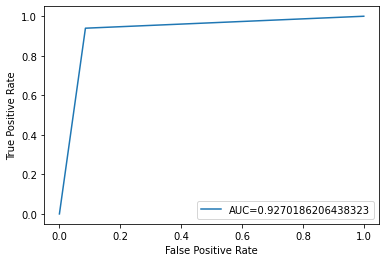

In [53]:
# ROC curve along with AUC
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Implementing K Fold Cross Validation,
### K=11, as there are close to 11000 data points

In [54]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=11)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 1005  1006  1007 ... 11052 11053 11054] TEST: [   0    1    2 ... 1002 1003 1004]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [1005 1006 1007 ... 2007 2008 2009]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [2010 2011 2012 ... 3012 3013 3014]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [3015 3016 3017 ... 4017 4018 4019]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [4020 4021 4022 ... 5022 5023 5024]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [5025 5026 5027 ... 6027 6028 6029]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [6030 6031 6032 ... 7032 7033 7034]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [7035 7036 7037 ... 8037 8038 8039]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [8040 8041 8042 ... 9042 9043 9044]
TRAIN: [    0     1     2 ... 11052 11053 11054] TEST: [ 9045  9046  9047 ... 10047 10048 10049]
TRAIN: [    0     1     2 ... 10047 10048 10049] TEST: [10050 10051 10052 ... 11052 

In [55]:
## NEW DECISION TREE MODEL ON THE NEW (X_train,X_test, y_train, y_test), AS PREPARED BY K FOLD CROSS VALIDATION

dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)
print("score on test: "  + str(dt1.score(X_test, y_test)))
print("score on train: " + str(dt1.score(X_train, y_train)))

score on test: 0.9134328358208955
score on train: 1.0


## As the testing accuracies are almost the same even after K Fold Cross Validation, thus the training has been validated.

In [ ]:
classifier = Sequential()
classifier.add(Dense(128, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(256, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(128, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.compile(optimizer="Adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history=classifier.fit(X_train, y_train, batch_size = 20, epochs = 1000)
y_pred_nn = classifier.predict(X_test)
y_pred_nn=(y_pred_nn>0.5)
y_pred_nn
f1_score(y_test, y_pred_nn)